In [1]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import category_encoders as ce

In [3]:
# pip install category_encoders
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
readmission_df = pd.read_csv('diabetic_data.csv')
readmission_df['diag_1'].head()

0    250.83
1       276
2       648
3         8
4       197
Name: diag_1, dtype: object

In [5]:
readmission_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
# Drop: admission_source_id, payer_code, medical_specialty, number_inpatient, number_outpatient, number_emergency, weight, patient_nbr, medications
readmission_cleaned = readmission_df.drop(columns=['admission_source_id', 'payer_code', 'medical_specialty', 'number_inpatient', 'number_outpatient', 'number_emergency', 
                                                  'weight', 'patient_nbr', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                                                           'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                                                           'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                                                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'])
readmission_cleaned['diag_1'].head()

0    250.83
1       276
2       648
3         8
4       197
Name: diag_1, dtype: object

In [7]:
readmission_cleaned = readmission_df.drop(columns=['admission_source_id', 'payer_code', 'medical_specialty', 'number_inpatient', 'number_outpatient', 'number_emergency', 
                                                  'weight', 'patient_nbr', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                                                           'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                                                           'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                                                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'])

substring = "V"
for i in range (0, len(readmission_cleaned['diag_1'])):
    if substring in readmission_cleaned['diag_1'][i]:
        readmission_cleaned['diag_1'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_2'])):
    if substring in readmission_cleaned['diag_2'][i]:
        readmission_cleaned['diag_2'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_3'])):
    if substring in readmission_cleaned['diag_3'][i]:
        readmission_cleaned['diag_3'][i]='2'
        
substring = "?"
for i in range (0, len(readmission_cleaned['diag_1'])):
    if substring in readmission_cleaned['diag_1'][i]:
        readmission_cleaned['diag_1'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_2'])):
    if substring in readmission_cleaned['diag_2'][i]:
        readmission_cleaned['diag_2'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_3'])):
    if substring in readmission_cleaned['diag_3'][i]:
        readmission_cleaned['diag_3'][i]='2'

substring = "E"
for i in range (0, len(readmission_cleaned['diag_1'])):
    if substring in readmission_cleaned['diag_1'][i]:
        readmission_cleaned['diag_1'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_2'])):
    if substring in readmission_cleaned['diag_2'][i]:
        readmission_cleaned['diag_2'][i]='2'
        
for i in range (0, len(readmission_cleaned['diag_3'])):
    if substring in readmission_cleaned['diag_3'][i]:
        readmission_cleaned['diag_3'][i]='2'

<ipython-input-7-e4f51a4c42e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_1'][i]='2'
<ipython-input-7-e4f51a4c42e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_2'][i]='2'
<ipython-input-7-e4f51a4c42e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_3'][i]='2'
<ipython-input-7-e4f51a4c42e1>:23: SettingWithCopyWarning: 
A value is trying to be s

In [12]:
readmission_cleaned['diag_1'].head()

0    250.83
1     276.0
2     648.0
3       8.0
4     197.0
Name: diag_1, dtype: object

In [13]:
for i in range (0, len(readmission_cleaned['diag_1'])):
    readmission_cleaned['diag_1'][i] = float(readmission_cleaned['diag_1'][i])
        

<ipython-input-13-5c4977a33e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_1'][i] = float(readmission_cleaned['diag_1'][i])


In [14]:
for i in range (0, len(readmission_cleaned['diag_2'])):
    readmission_cleaned['diag_2'][i] = float(readmission_cleaned['diag_2'][i])
        

<ipython-input-14-5274833e5527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_2'][i] = float(readmission_cleaned['diag_2'][i])


In [15]:
for i in range (0, len(readmission_cleaned['diag_3'])):
    readmission_cleaned['diag_3'][i] = float(readmission_cleaned['diag_3'][i])

<ipython-input-15-0777ebef4d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_cleaned['diag_3'][i] = float(readmission_cleaned['diag_3'][i])


In [16]:
# Making bins for diagnosis groups
# 'Circulatory','Respiratory','Digestive','Diabetes','Injury','Musculoskeletal','Genitourinary','Neoplasms','Other'
bin_names = ['Other','Neoplasms','Diabetes','Neoplasms','Other','Neoplasms','Other','Circulatory','Respiratory','Digestive','Genitourinary'
             ,'Other','Neoplasms','Musculoskeletal','Other','Neoplasms','Circulatory','Respiratory','Digestive','Genitourinary',
             'Neoplasms','Injury']
bins = [0,139,249.99,250.99,279,289,319,389,459,519,579,629,679,709,739,759,784,785,786,787,788,799,1000]
readmission_cleaned['diag_1'] = pd.cut(readmission_cleaned['diag_1'], bins, labels=bin_names, include_lowest=True, ordered = False)
readmission_cleaned['diag_2'] = pd.cut(readmission_cleaned['diag_2'], bins, labels=bin_names, include_lowest=True, ordered = False)
readmission_cleaned['diag_3'] = pd.cut(readmission_cleaned['diag_3'], bins, labels=bin_names, include_lowest=True, ordered = False)


readmission_cleaned.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,readmitted
0,2278392,Caucasian,Female,[0-10),6,25,1,41,0,1,Diabetes,Other,Other,1,None,None,NO
1,149190,Caucasian,Female,[10-20),1,1,3,59,0,18,Neoplasms,Diabetes,Neoplasms,9,None,None,>30
2,64410,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,Other,Diabetes,Other,6,None,None,NO
3,500364,Caucasian,Male,[30-40),1,1,2,44,1,16,Other,Diabetes,Circulatory,7,None,None,NO
4,16680,Caucasian,Male,[40-50),1,1,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,NO


In [17]:
readmission_cleaned['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [18]:
readmission_cleaned[readmission_cleaned['readmitted'] == '>30'].head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,readmitted
1,149190,Caucasian,Female,[10-20),1,1,3,59,0,18,Neoplasms,Diabetes,Neoplasms,9,None,None,>30
5,35754,Caucasian,Male,[50-60),2,1,3,31,6,16,Circulatory,Circulatory,Diabetes,9,None,None,>30
7,63768,Caucasian,Male,[70-80),1,1,5,73,0,12,Circulatory,Respiratory,Diabetes,8,None,None,>30
10,28236,AfricanAmerican,Female,[40-50),1,1,9,47,2,17,Diabetes,Circulatory,Injury,9,None,None,>30
14,62256,AfricanAmerican,Female,[60-70),3,1,1,49,5,2,Respiratory,Injury,Genitourinary,8,None,None,>30


In [47]:
readmission_cleaned['Target'] = readmission_cleaned['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

readmission_cleaned.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,readmitted,Target
0,2278392,Caucasian,Female,[0-10),6,25,1,41,0,1,Diabetes,Other,Other,1,None,None,NO,0
1,149190,Caucasian,Female,[10-20),1,1,3,59,0,18,Neoplasms,Diabetes,Neoplasms,9,None,None,>30,0
2,64410,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,Other,Diabetes,Other,6,None,None,NO,0
3,500364,Caucasian,Male,[30-40),1,1,2,44,1,16,Other,Diabetes,Circulatory,7,None,None,NO,0
4,16680,Caucasian,Male,[40-50),1,1,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,NO,0


In [39]:
#readmission_cleaned['race'] = readmission_cleaned['race'].apply(lambda x: 'Other' if x == '?' else )
#readmission_cleaned.head()

In [40]:
#readmission_nogender = readmission_cleaned.drop(['gender'] == 'Unknown/Invalid')

In [48]:
readmission_cleaned2 = readmission_cleaned.drop(columns=["readmitted", 'encounter_id', 'admission_type_id', 'A1Cresult', 'max_glu_serum', 'discharge_disposition_id'])

In [49]:
# encode/get dummies: race, gender, age, admission_type_id, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult
ce_OHE = ce.OneHotEncoder(cols=['race','gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses'])

readmission_encoded = ce_OHE.fit_transform(readmission_cleaned2)
readmission_encoded.head()

,race_1,race_2,race_3,race_4,race_5,race_6,gender_1,gender_2,gender_3,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1_1,diag_1_2,diag_1_3,diag_1_4,diag_1_5,diag_1_6,diag_1_7,diag_1_8,diag_1_9,diag_2_1,diag_2_2,diag_2_3,diag_2_4,diag_2_5,diag_2_6,diag_2_7,diag_2_8,diag_2_9,diag_3_1,diag_3_2,diag_3_3,diag_3_4,diag_3_5,diag_3_6,diag_3_7,diag_3_8,diag_3_9,number_diagnoses_1,number_diagnoses_2,number_diagnoses_3,number_diagnoses_4,number_diagnoses_5,number_diagnoses_6,number_diagnoses_7,number_diagnoses_8,number_diagnoses_9,number_diagnoses_10,number_diagnoses_11,number_diagnoses_12,number_diagnoses_13,number_diagnoses_14,number_diagnoses_15,number_diagnoses_16,Target
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,41,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3,59,0,18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,11,5,13,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,44,1,16,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,51,0,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


race_1
race_2
race_3
race_4
race_5
race_6
gender_1
gender_2
gender_3
age_1
age_2
age_3
age_4
age_5
age_6
age_7
age_8
age_9
age_10
time_in_hospital


<ipython-input-41-a86ee1c3e004>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


num_lab_procedures
num_procedures
num_medications
diag_1_1
diag_1_2
diag_1_3
diag_1_4
diag_1_5
diag_1_6
diag_1_7
diag_1_8
diag_1_9
diag_2_1
diag_2_2
diag_2_3
diag_2_4
diag_2_5
diag_2_6
diag_2_7
diag_2_8
diag_2_9
diag_3_1
diag_3_2
diag_3_3
diag_3_4
diag_3_5
diag_3_6
diag_3_7
diag_3_8
diag_3_9
number_diagnoses_1
number_diagnoses_2
number_diagnoses_3
number_diagnoses_4
number_diagnoses_5
number_diagnoses_6
number_diagnoses_7
number_diagnoses_8
number_diagnoses_9
number_diagnoses_10
number_diagnoses_11
number_diagnoses_12
number_diagnoses_13
number_diagnoses_14
number_diagnoses_15
number_diagnoses_16


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

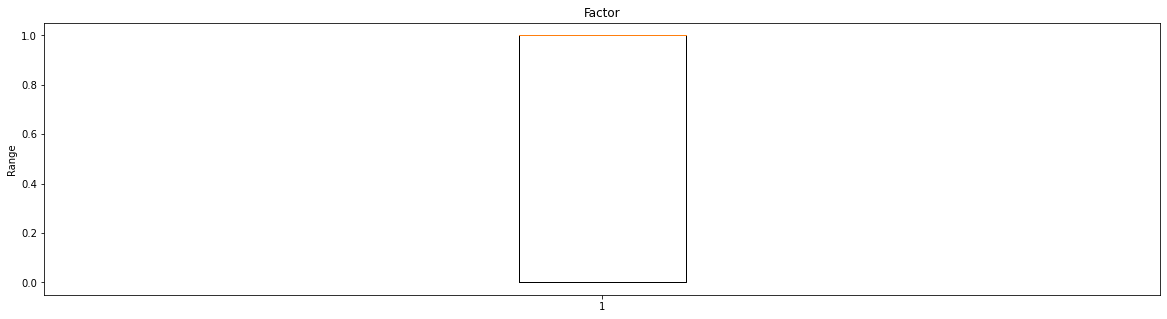

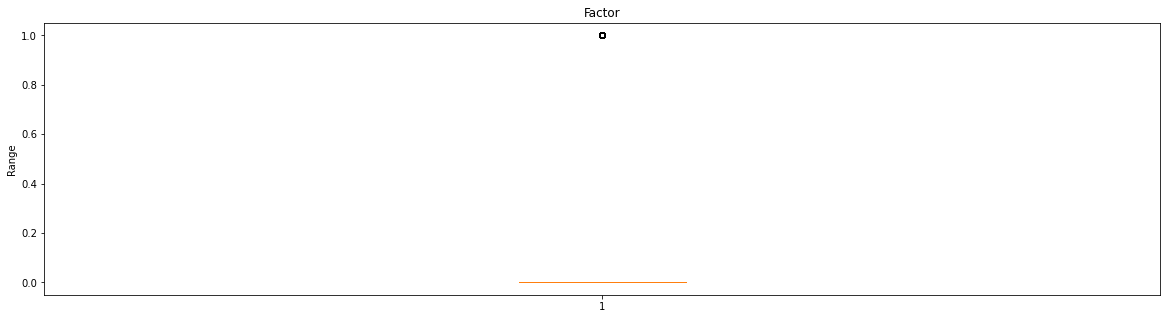

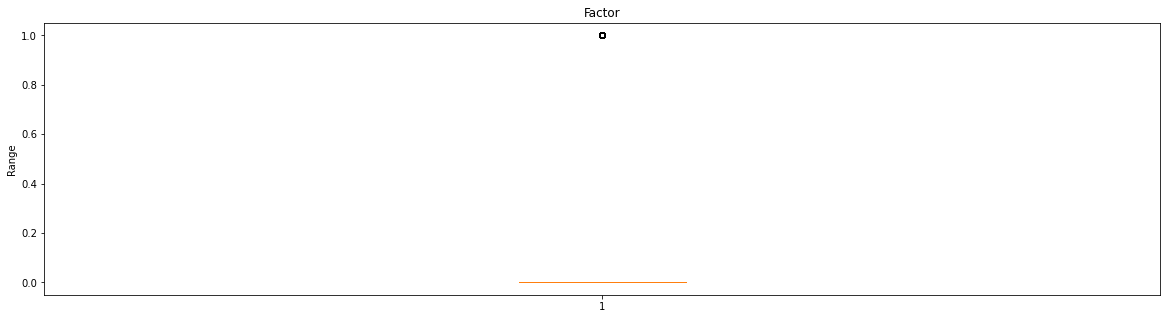

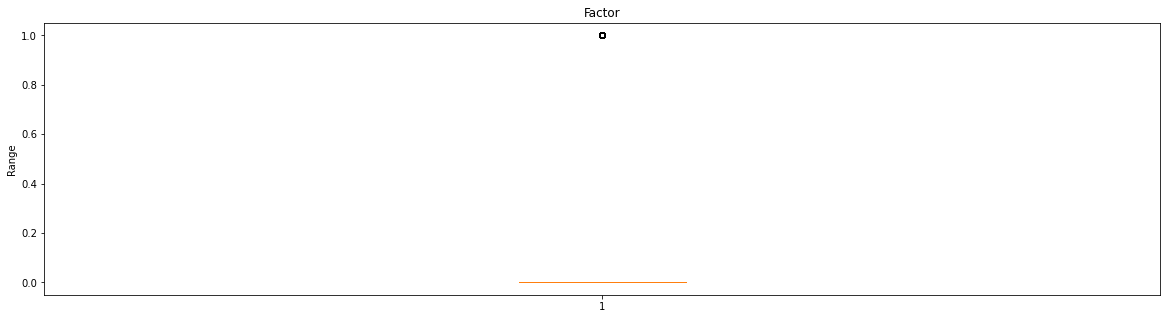

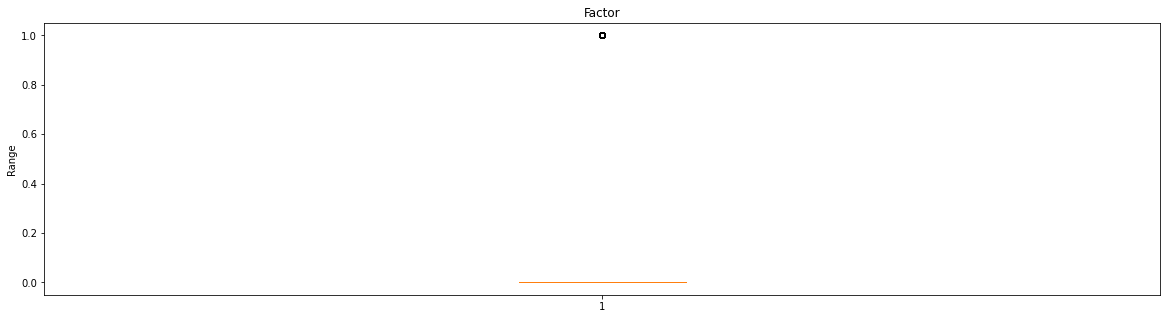

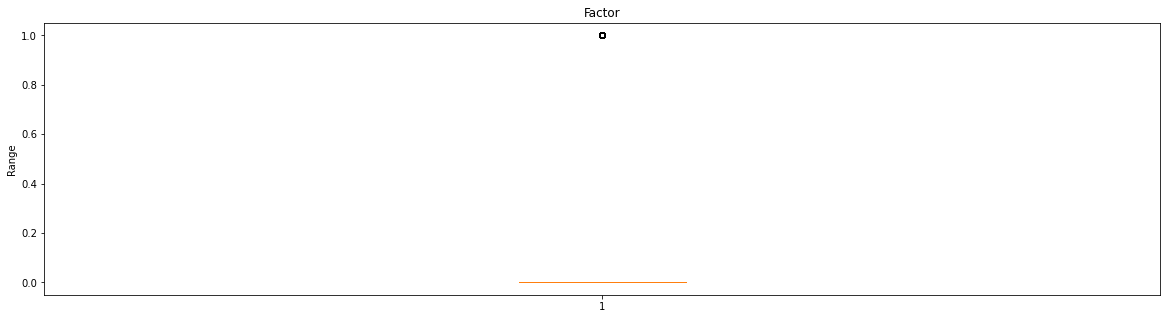

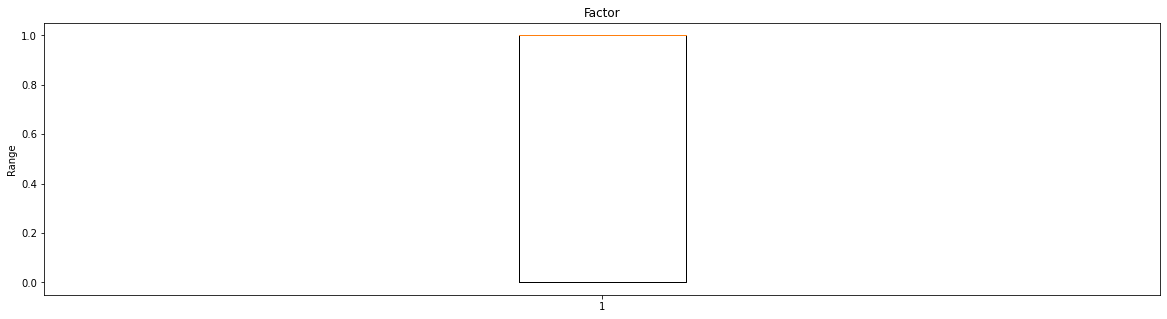

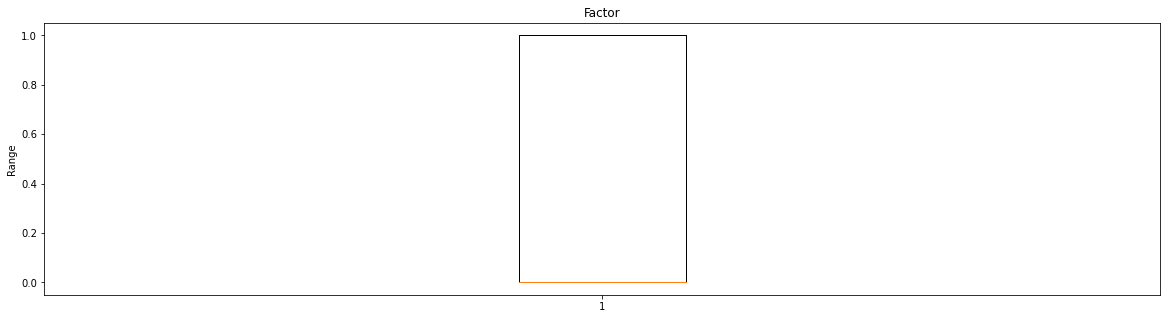

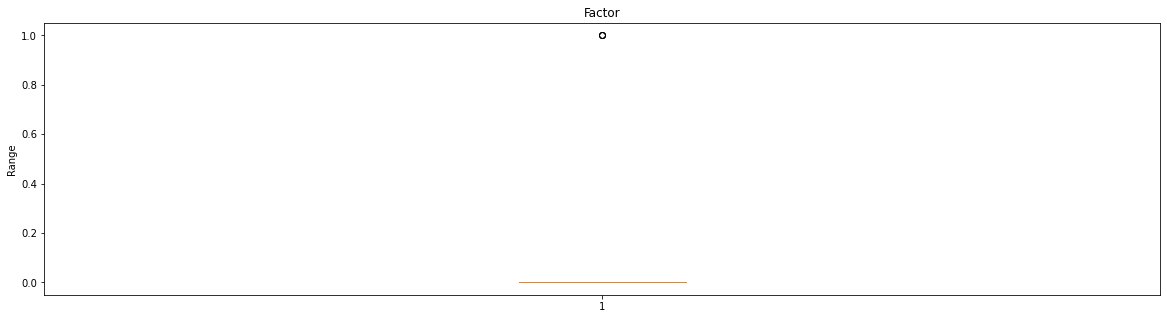

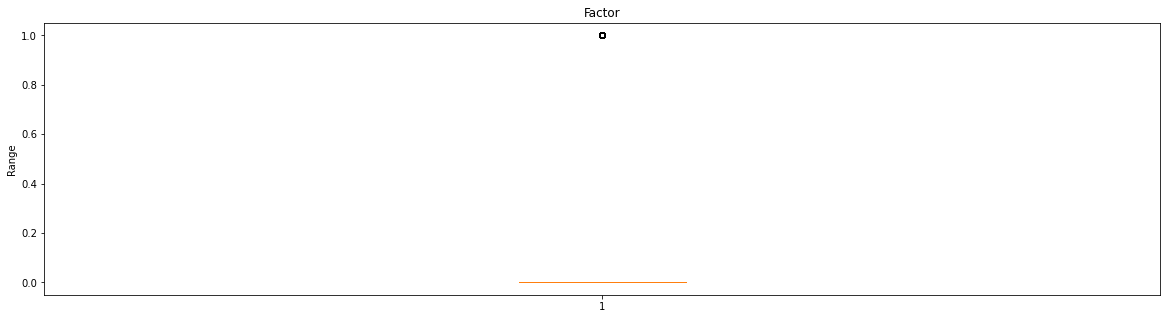

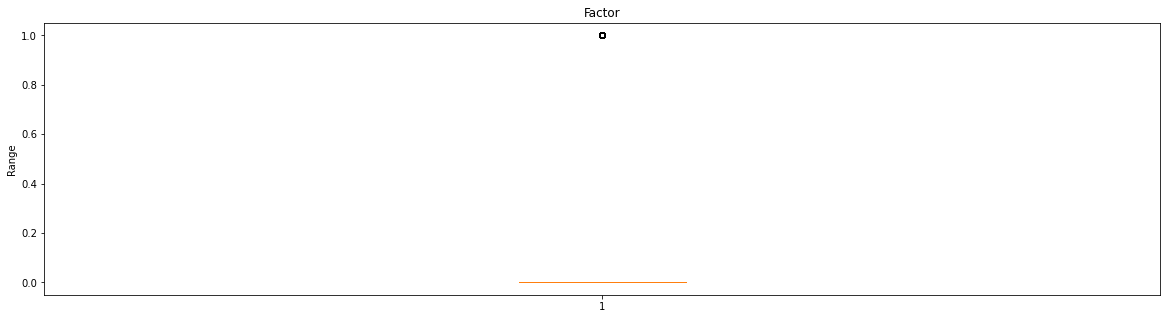

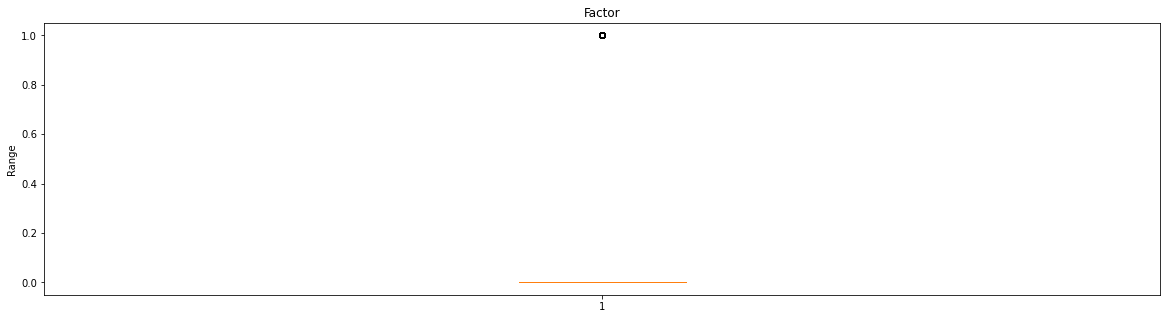

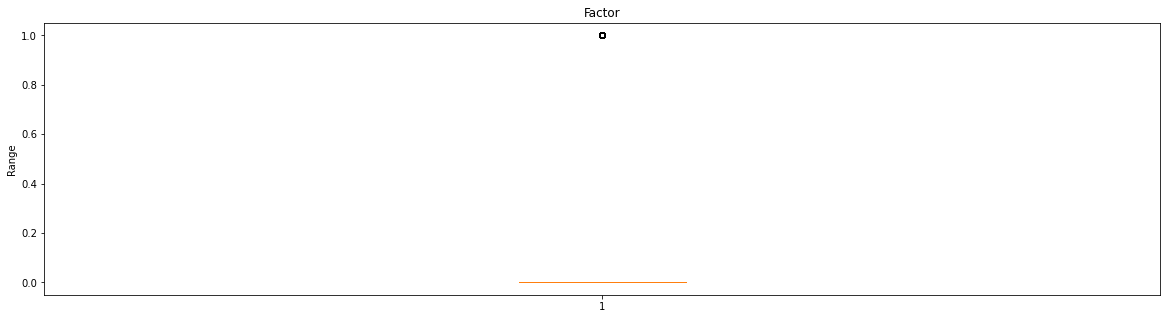

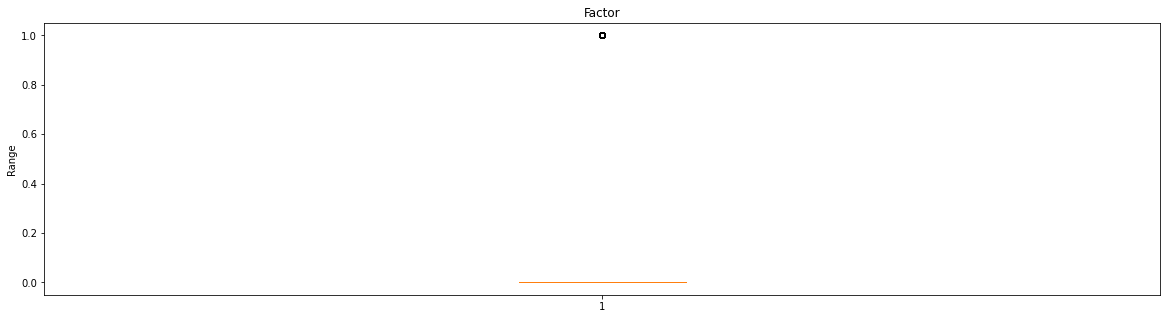

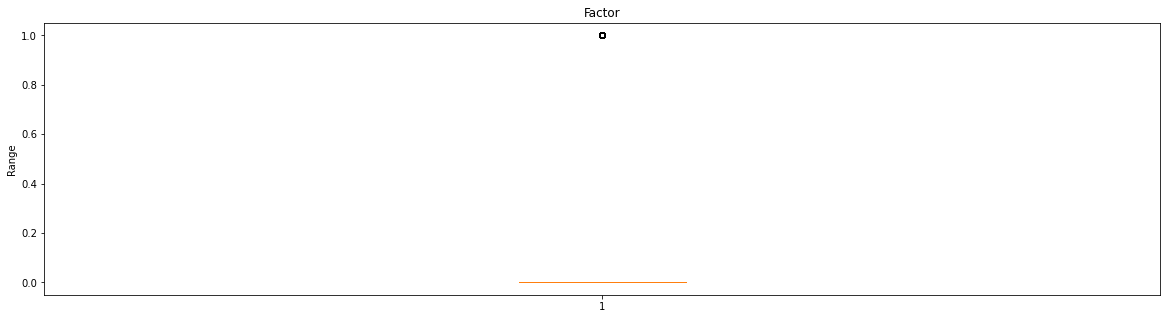

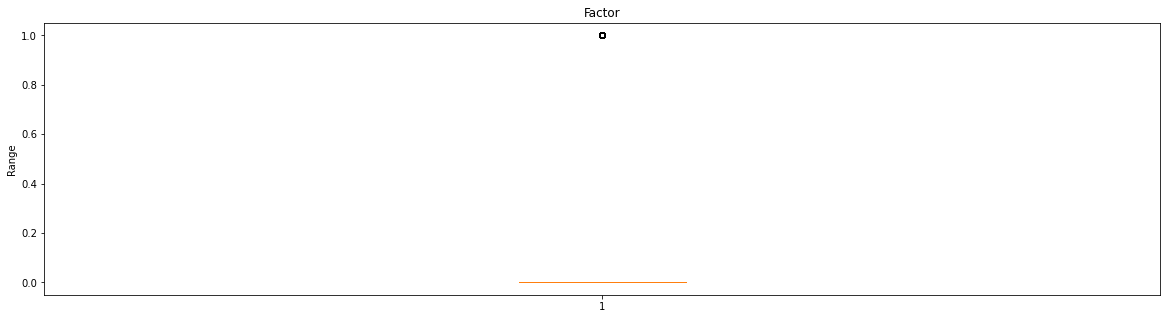

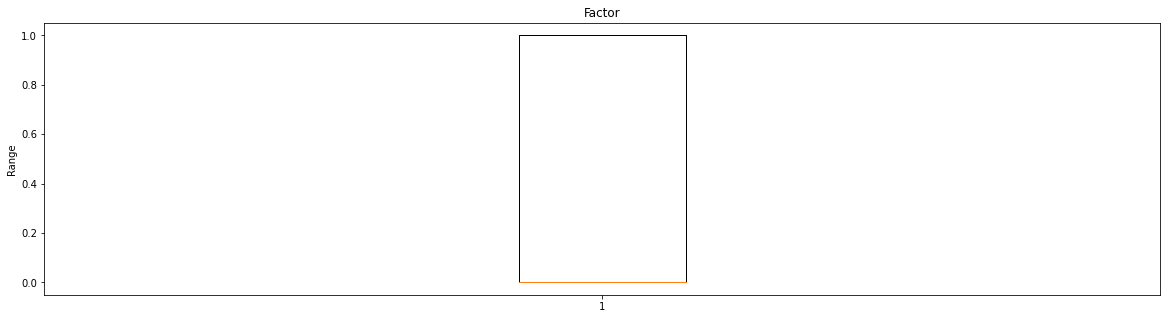

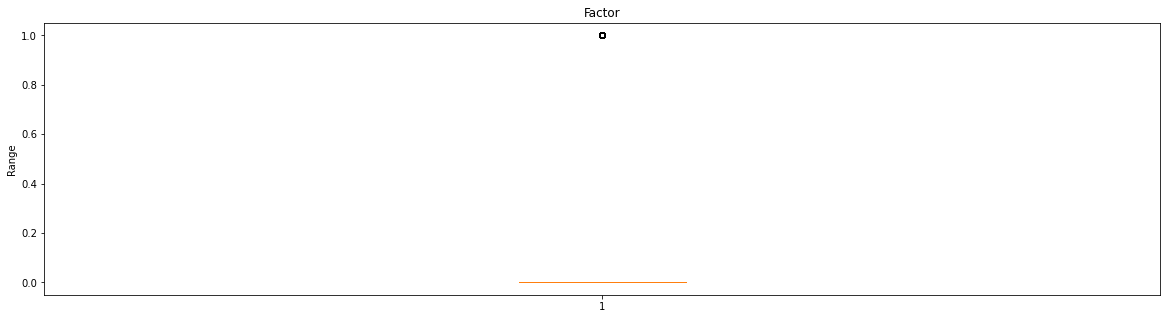

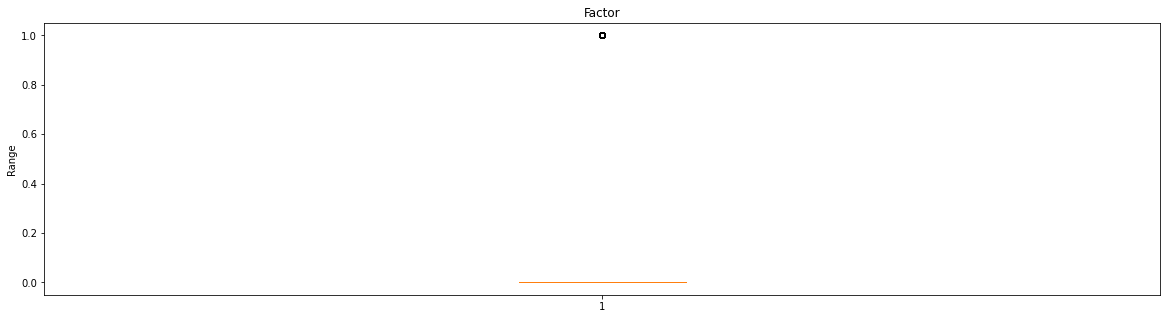

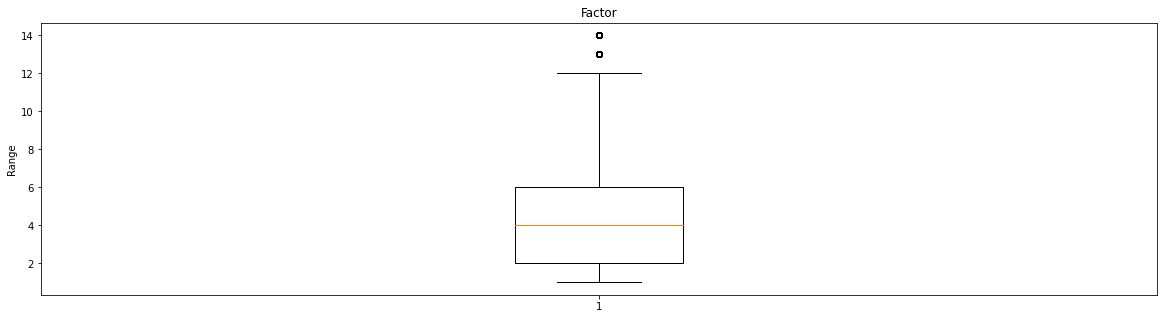

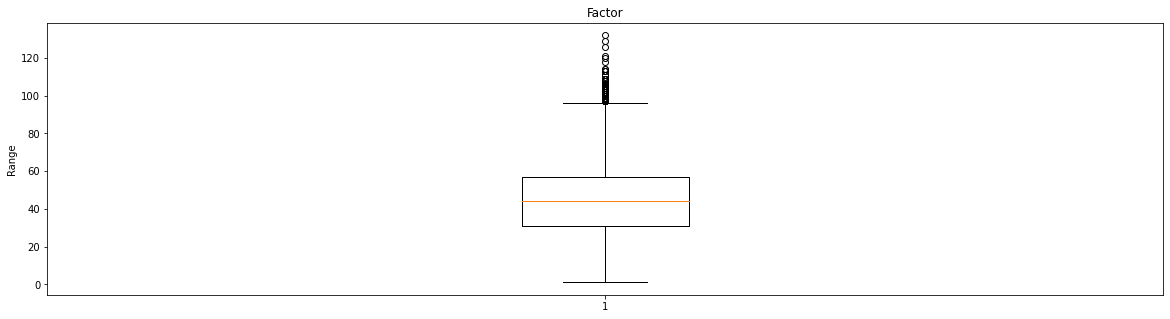

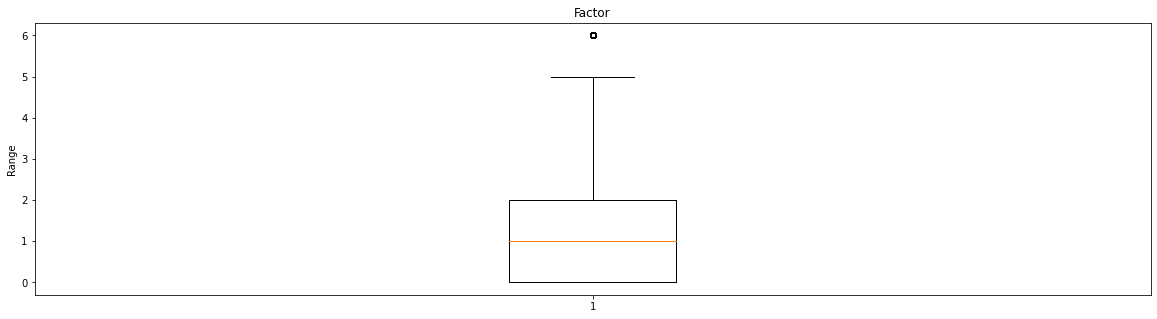

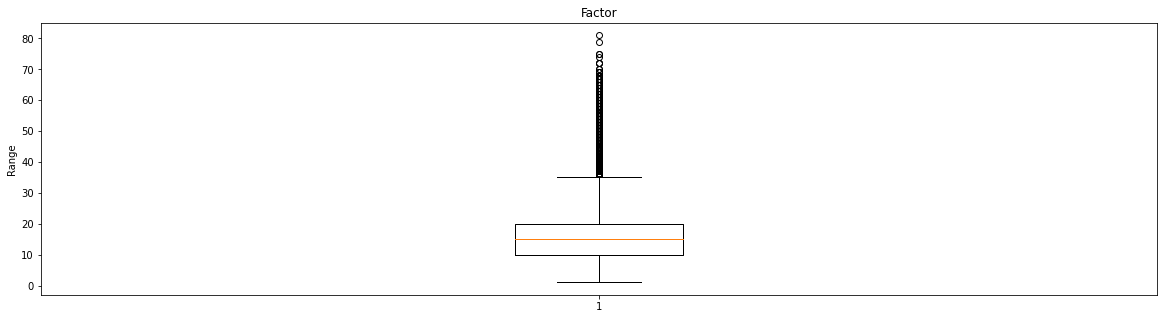

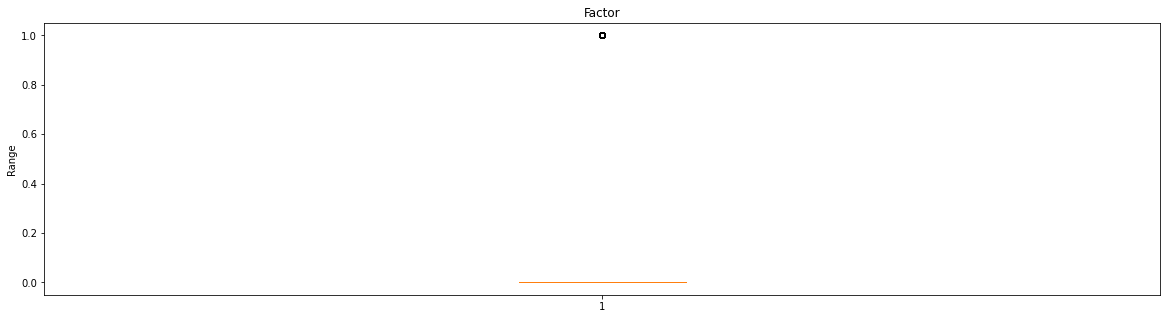

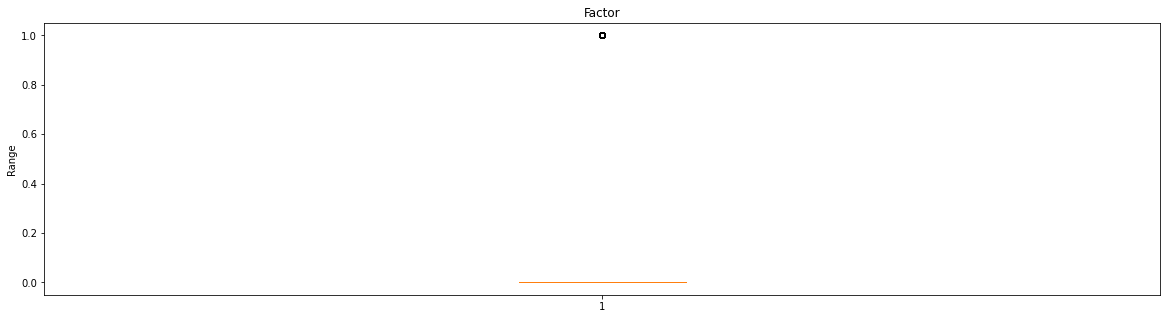

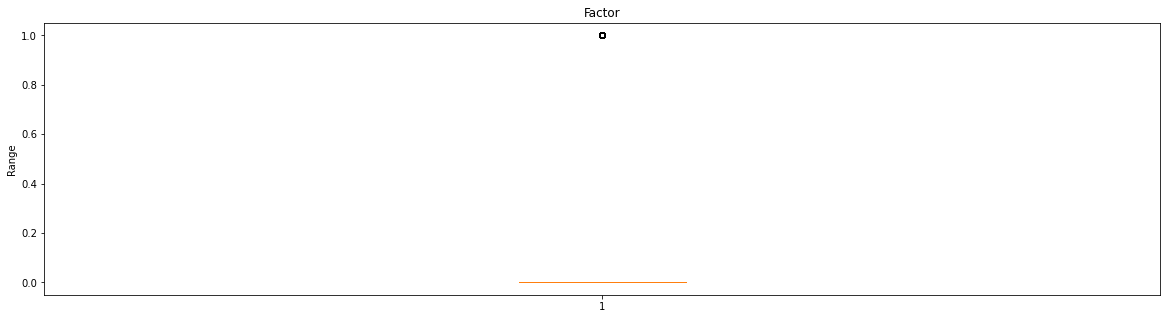

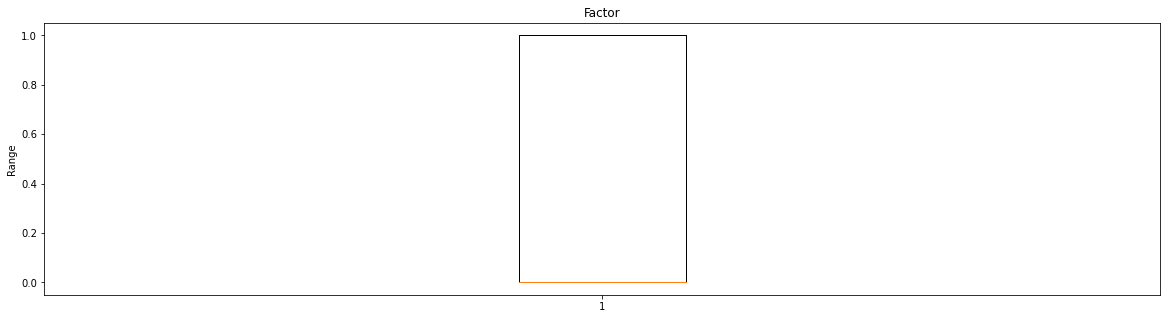

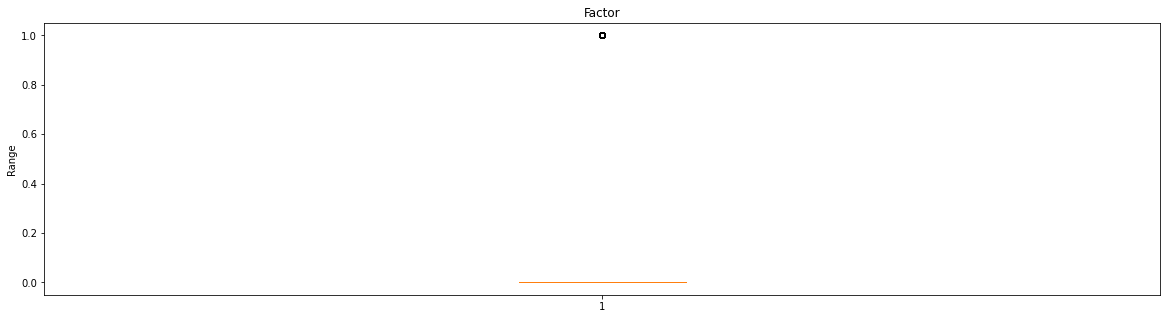

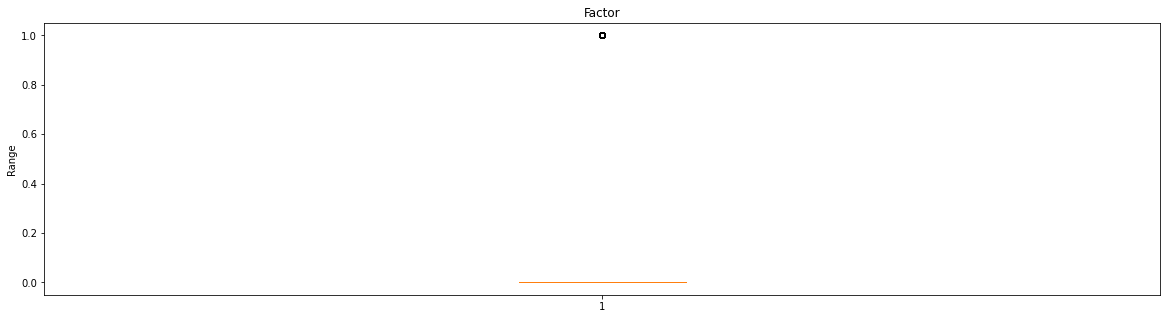

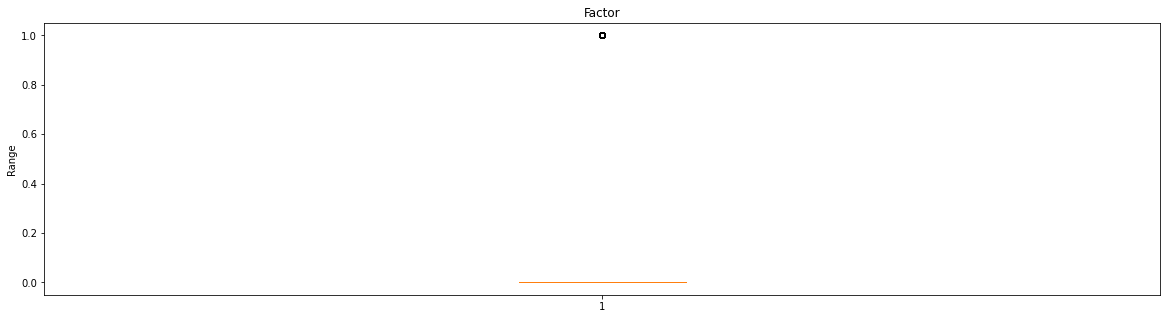

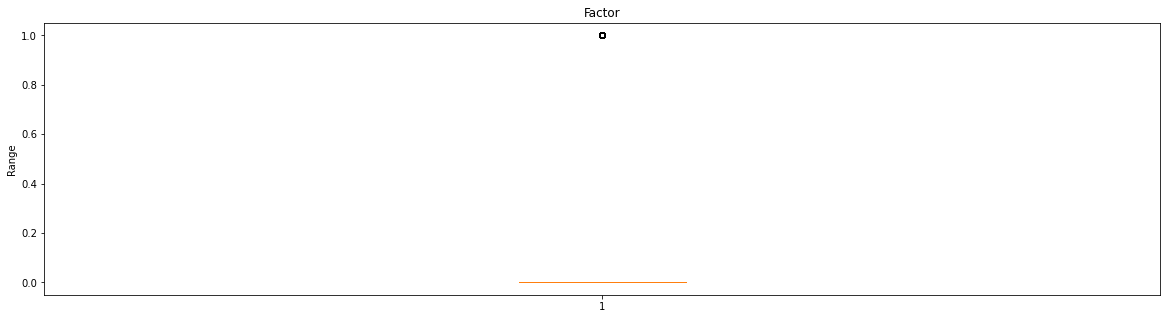

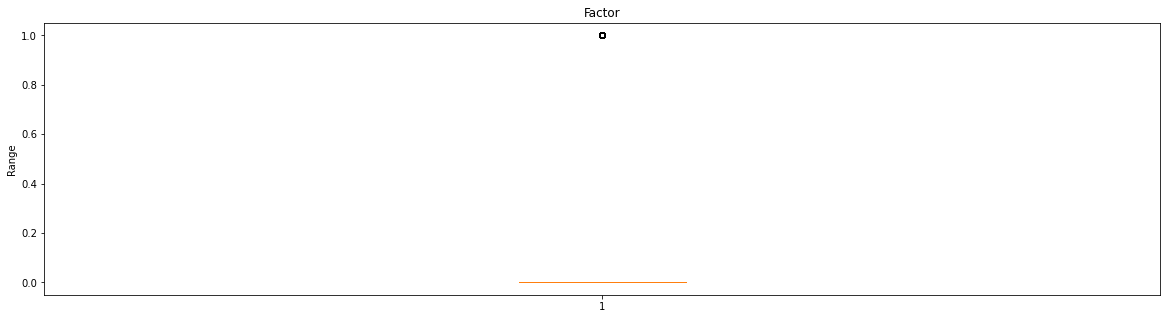

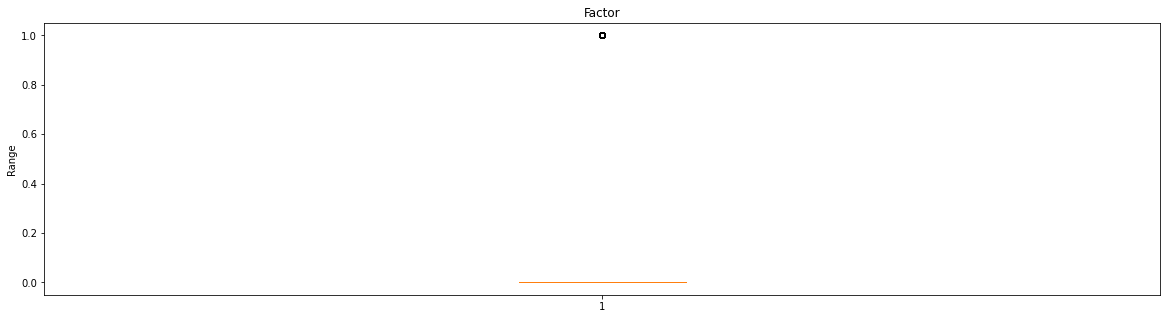

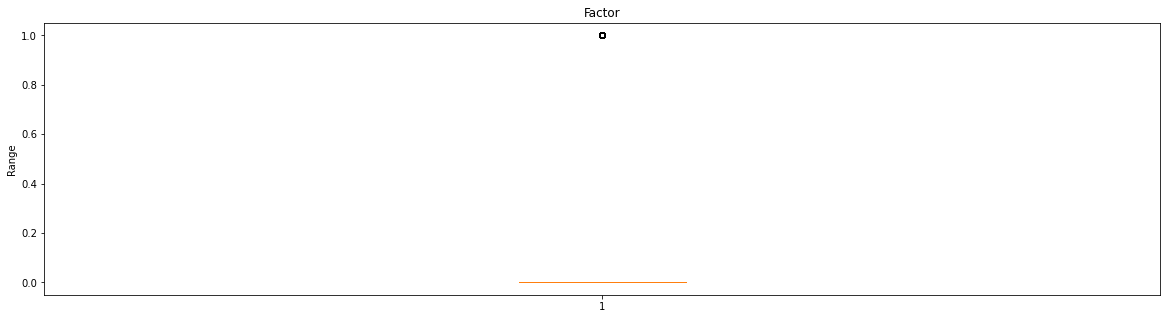

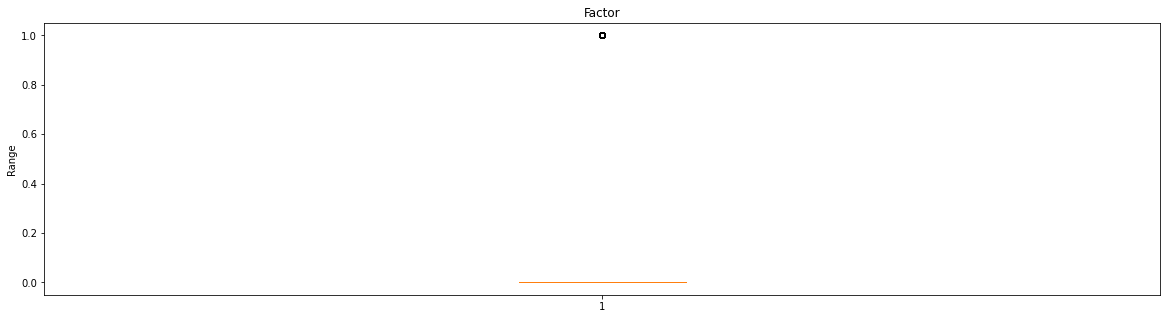

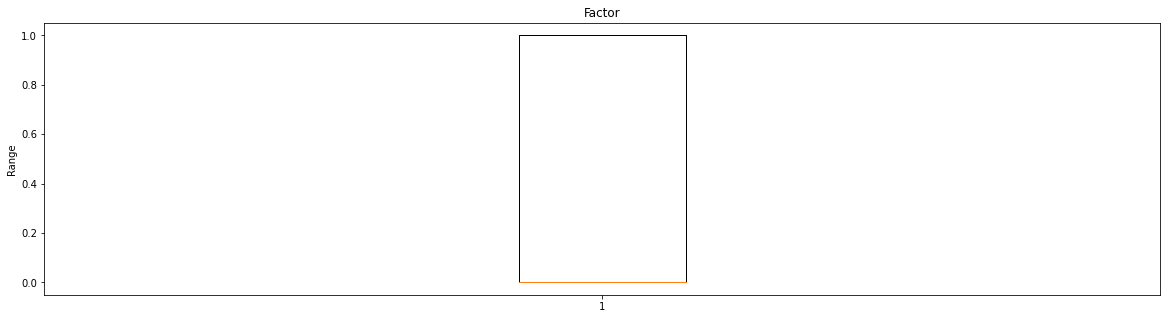

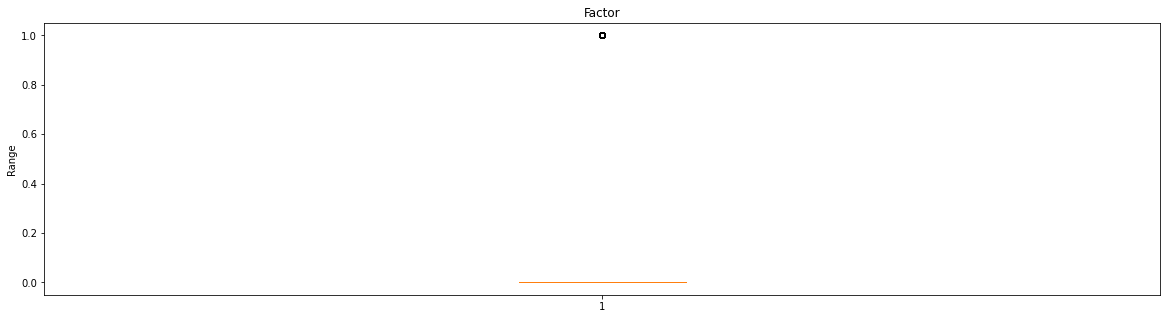

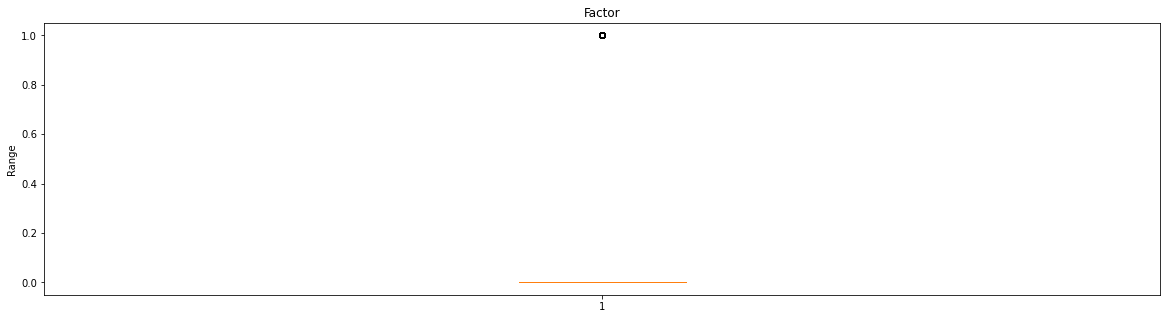

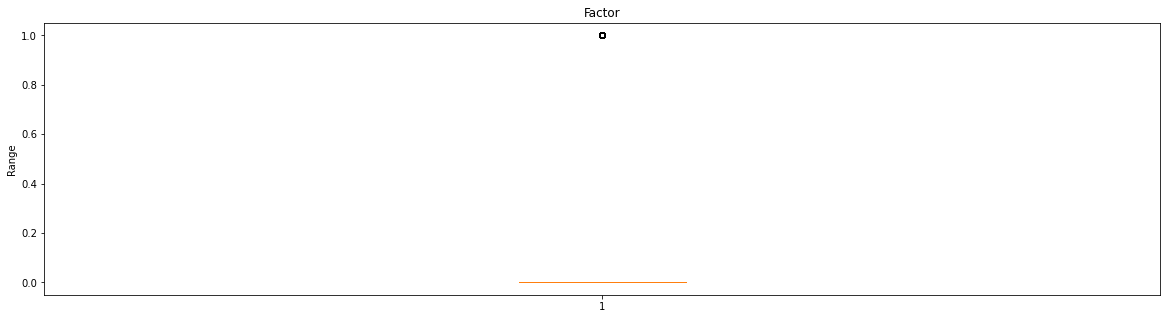

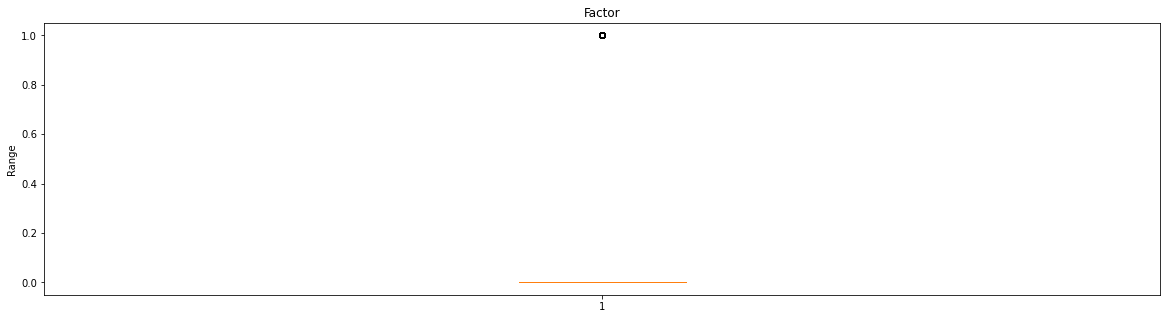

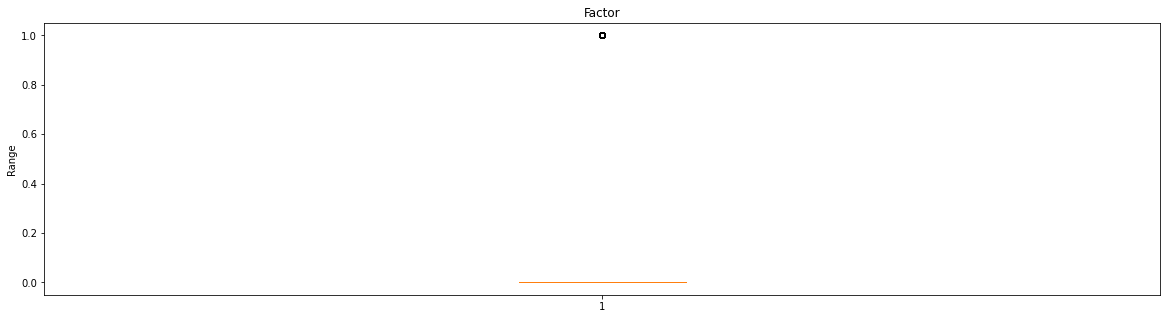

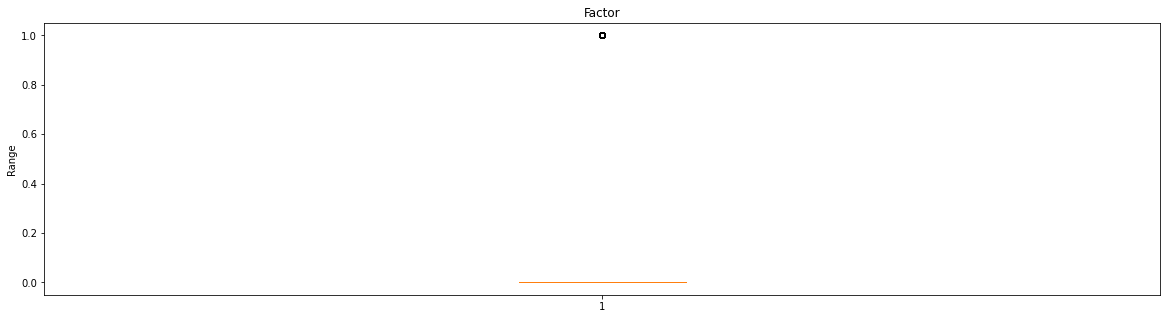

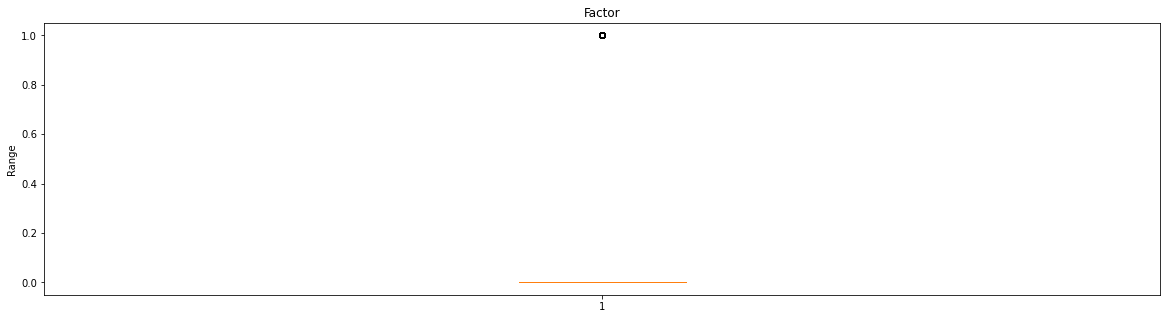

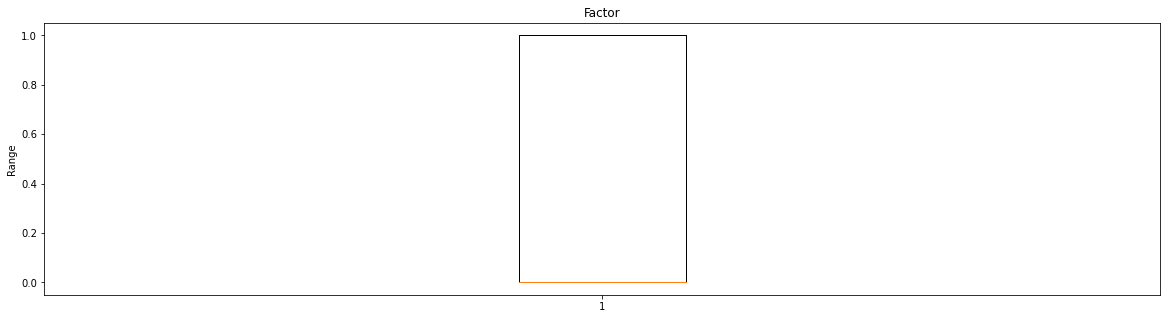

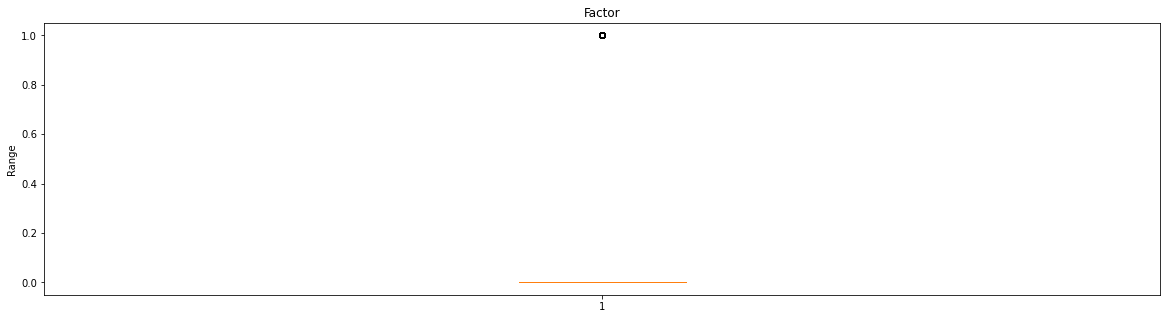

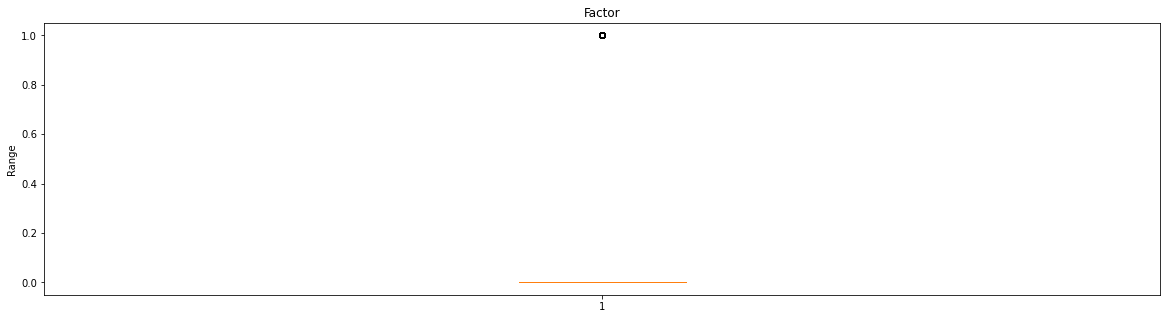

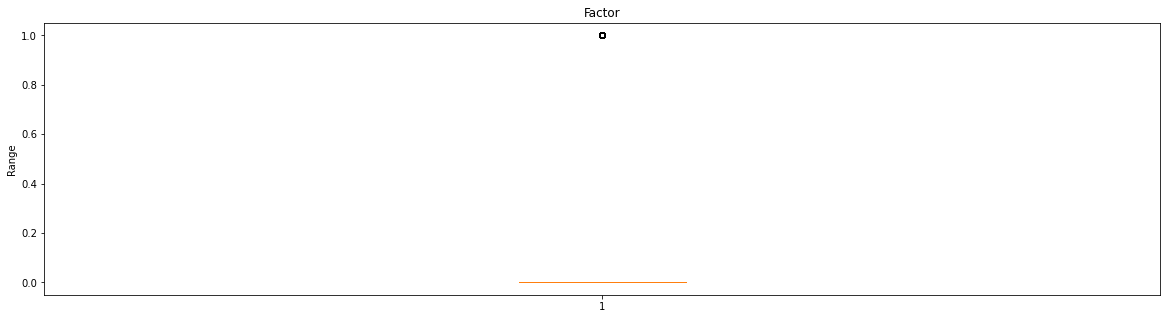

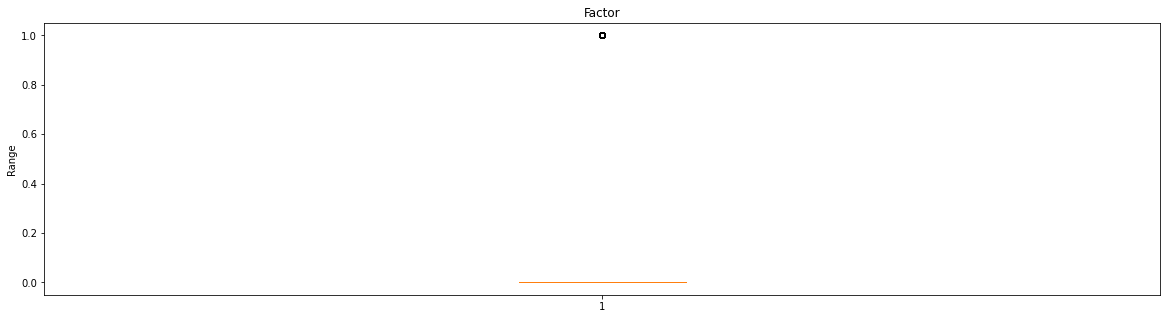

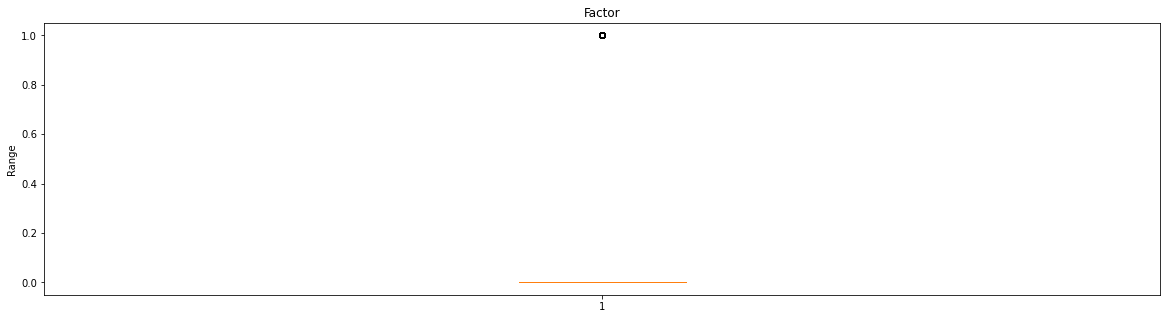

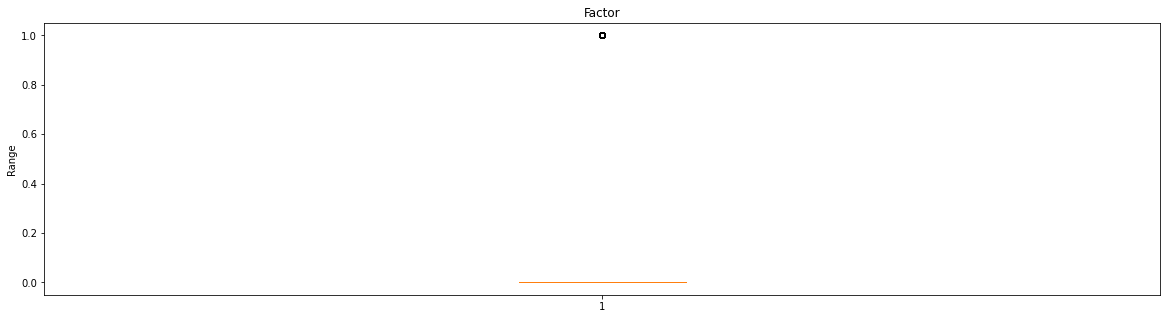

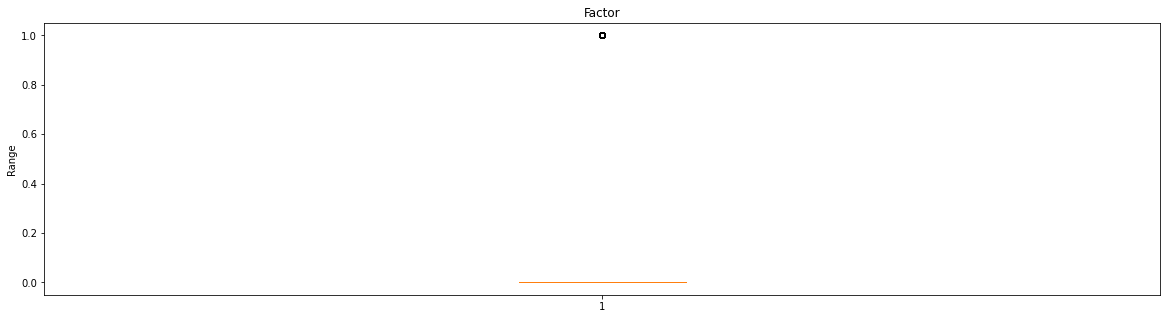

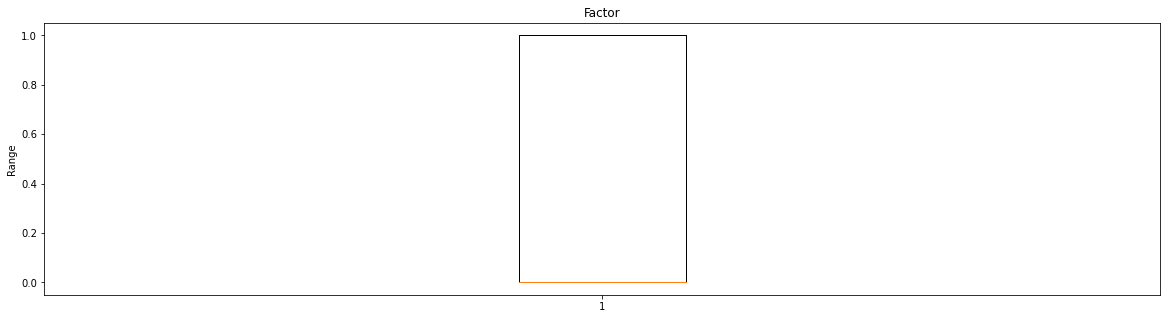

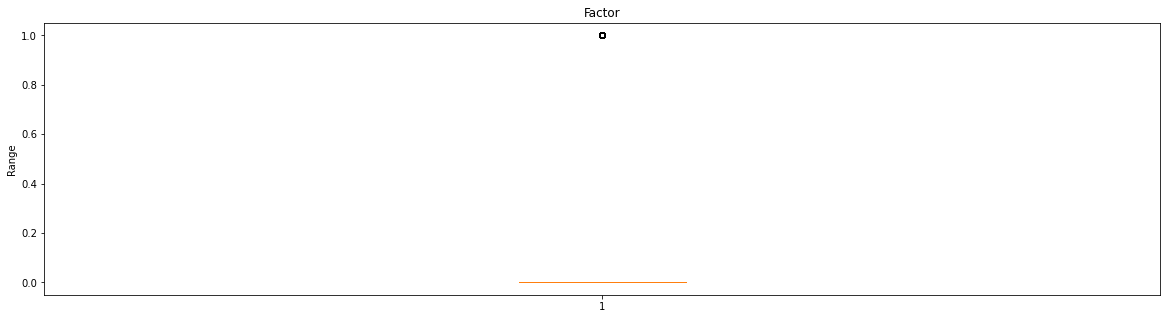

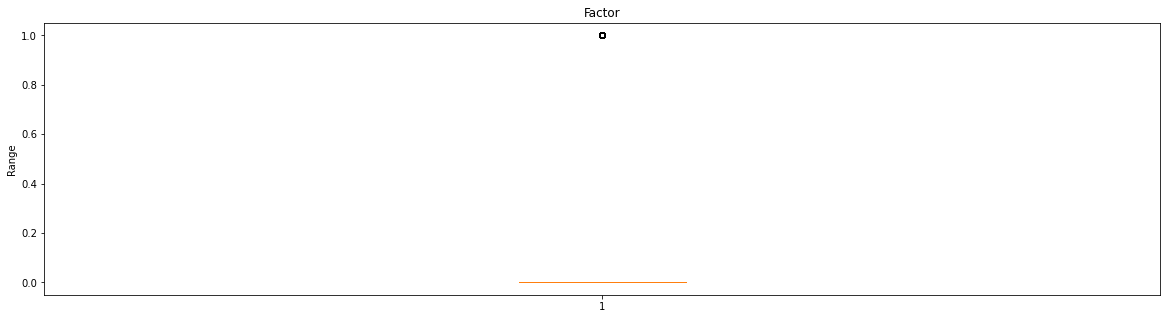

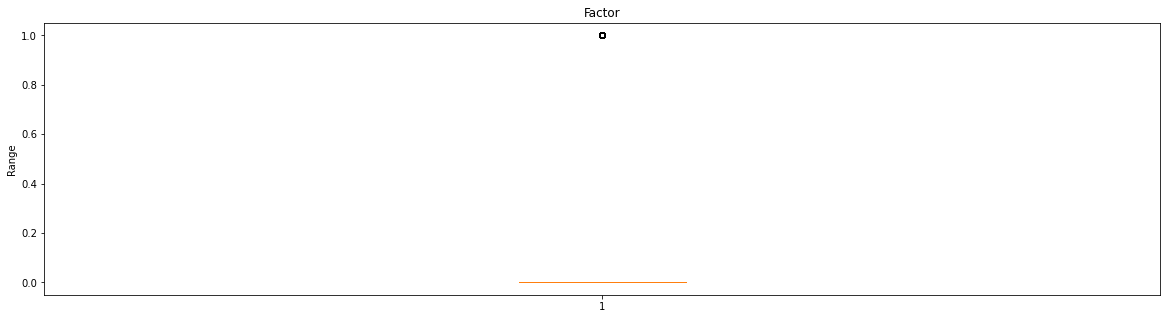

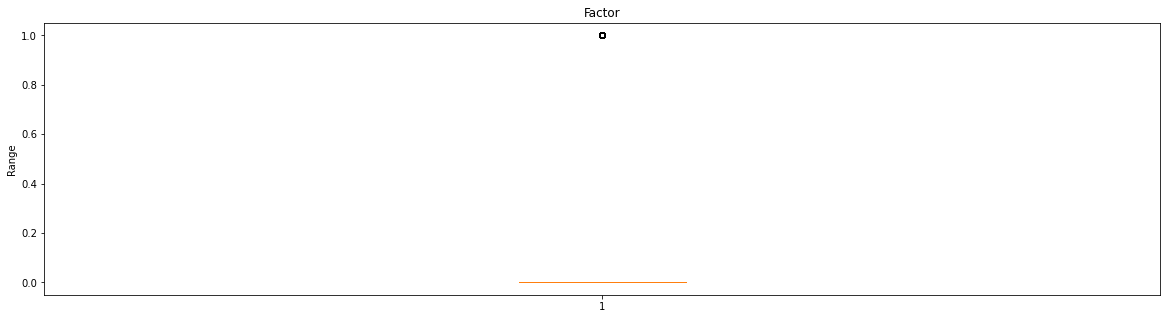

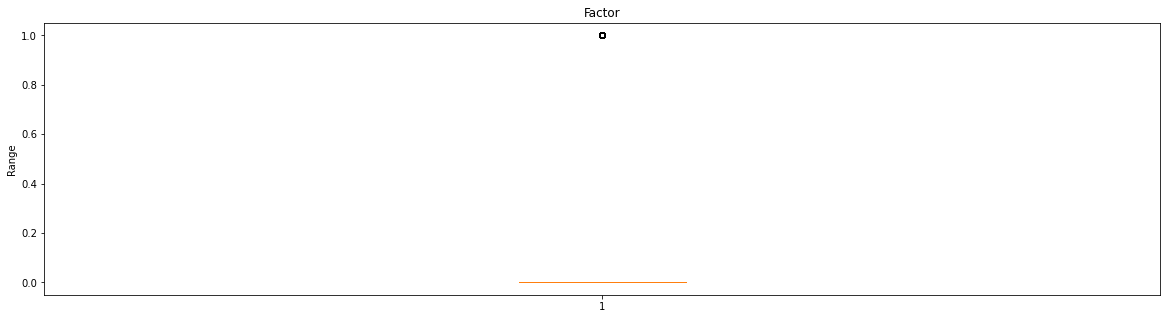

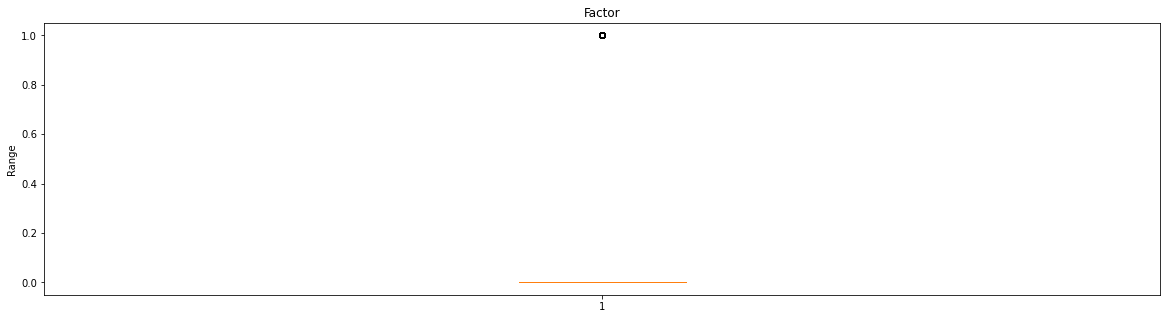

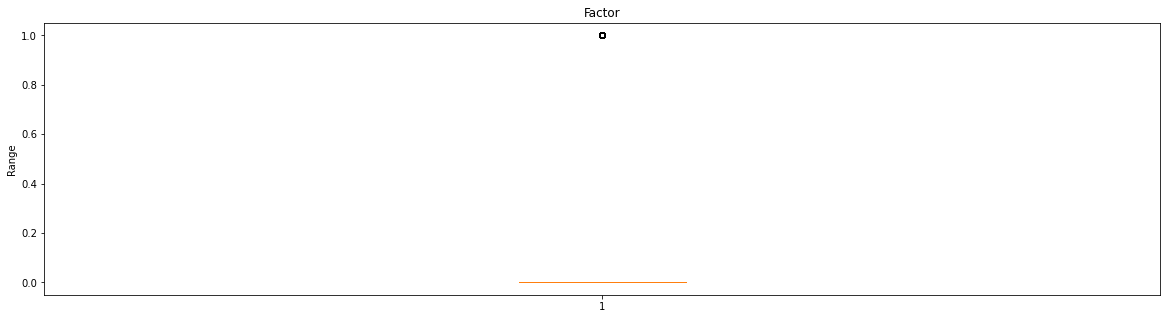

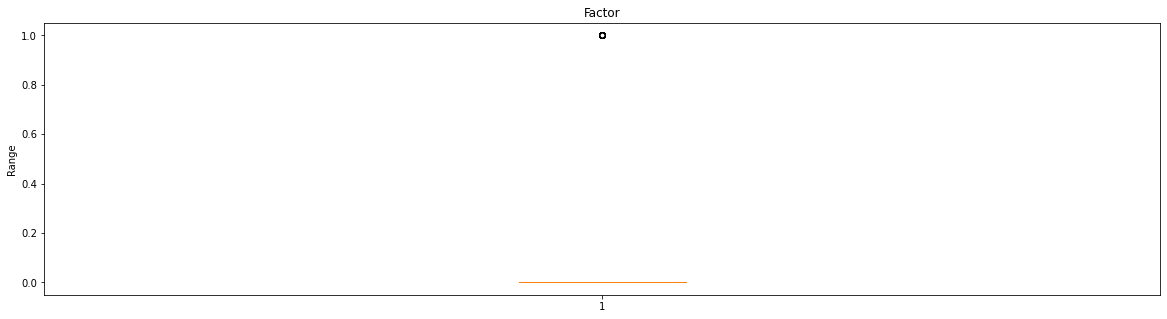

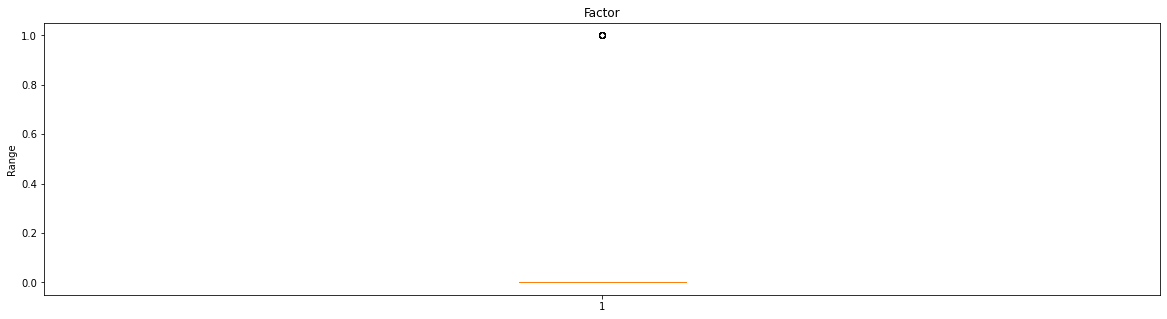

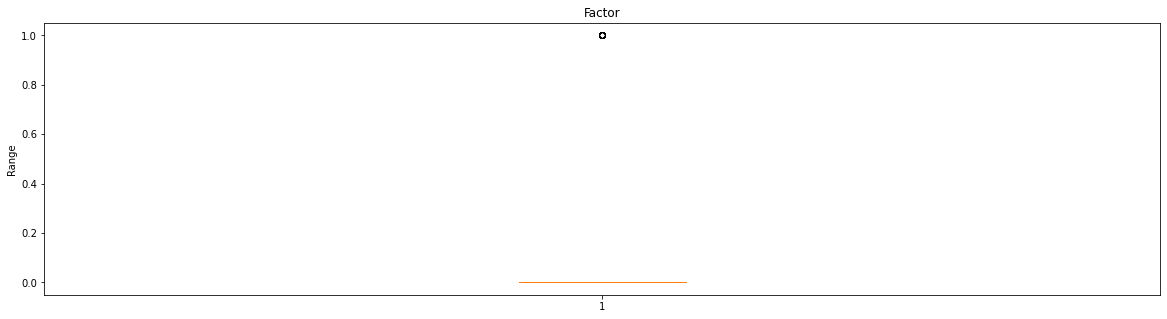

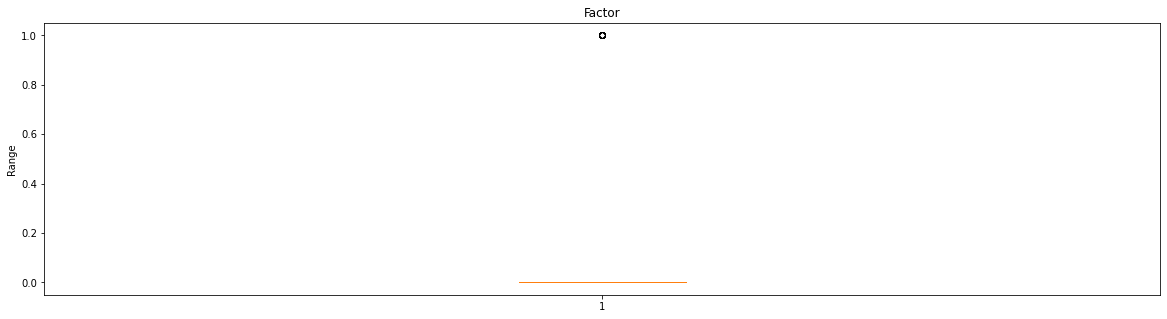

Error in callback <function flush_figures at 0x0000019FA6C2D550> (for post_execute):


KeyboardInterrupt: 

In [41]:
outliers = []
bounds = {}

for i in readmission_encoded.columns:
    
    factors = readmission_encoded[i]
    fig1, ax1 = plt.subplots()
    ax1.set_title('Factor')
    ax1.set_ylabel('Range')
    ax1.boxplot(factors)
    print(i)
    quartiles = np.quantile(factors,[.25,.75])
    iqr = quartiles[1]-quartiles[0]
    lower_bound = quartiles[0]-(1.5*iqr)
    upper_bound = quartiles[1]+(1.5*iqr)
    bounds[i] = (lower_bound, upper_bound)
    potential_outliers = [i for i in factors if i < lower_bound or i > upper_bound]
    #print(potential_outliers)
    # plt.show()

# When run, # of lab procedures and # of medications are only two columns with enough outliers worth mentioning.


In [28]:
readmission_dict = readmission_encoded.to_dict()

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
y = readmission_encoded.Target.values
X = readmission_encoded.drop(columns="Target").values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [52]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9999082857292595
Testing Score: 0.8910856064774781


In [42]:
import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [56]:
# First create the base model to tune
rf = RandomForestRegressor()
# Rndom search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
clf = RandomForestClassifier(n_estimators=800, max_depth =90, min_samples_split =2, min_samples_leaf =4, max_features = 'sqrt').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')